In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
iris_path = Path.cwd() / 'data' / 'iris.data'
iris_df = pd.read_csv(iris_path, header=None)
iris_df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [2]:
y = iris_df.iloc[0:100, 4].values
y = np.where( y=='Iris-setosa', -1, 1 )
X = iris_df.iloc[0:100, [0,2]].values

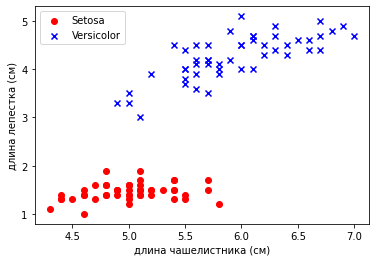

In [3]:
idx0 = y==-1 ; idx1 = y==1
plt.scatter(X[idx0,0], X[idx0,1], color='red', marker='o', label='Setosa')
plt.scatter(X[idx1,0], X[idx1,1], color='blue', marker='x', label='Versicolor')
plt.xlabel('длина чашелистника (см)')
plt.ylabel('длина лепестка (см)')
plt.legend(loc='upper left')

In [4]:
from Adaline import Adaline

### Масштабирование признаков

In [5]:
X_std = X - X.mean(0)

In [6]:
X_std /= X_std.std(0)

In [7]:
ada1 = Adaline(random_state=1)
ada1.fit(X_std, y)

Text(0, 0.5, 'стоимость')

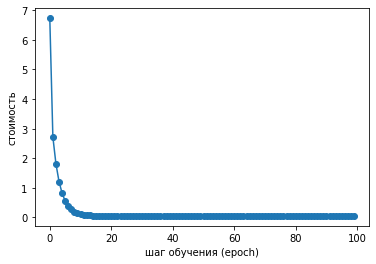

In [8]:
plt.plot(ada1.cost_, marker='o')
plt.xlabel('шаг обучения (epoch)')
plt.ylabel('стоимость')

Text(0, 0.5, 'стоимость')

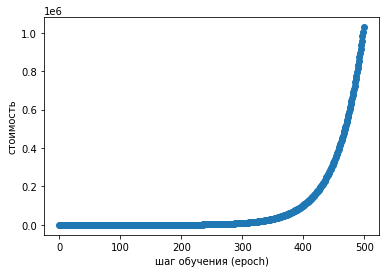

In [18]:
ada2 = Adaline(eta=0.0111,random_state=2,n_iter=500)
ada2.fit(X_std, y)
plt.plot(ada2.cost_, marker='o')
plt.xlabel('шаг обучения (epoch)')
plt.ylabel('стоимость')

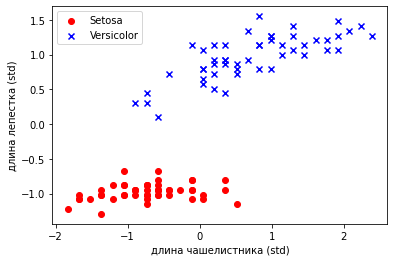

In [20]:
idx0 = y==-1 ; idx1 = y==1
plt.scatter(X_std[idx0,0], X_std[idx0,1], color='red', marker='o', label='Setosa')
plt.scatter(X_std[idx1,0], X_std[idx1,1], color='blue', marker='x', label='Versicolor')
plt.xlabel('длина чашелистника (std)')
plt.ylabel('длина лепестка (std)')
plt.legend(loc='upper left')

In [10]:
from myplot import plot_decision_regions

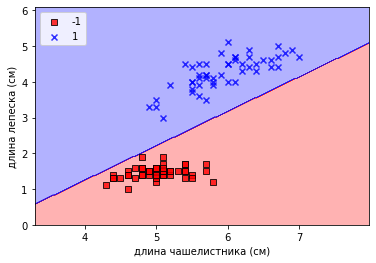

In [18]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('длина чашелистника (см)')
plt.ylabel('длина лепеска (см)')
plt.legend(loc='upper left')

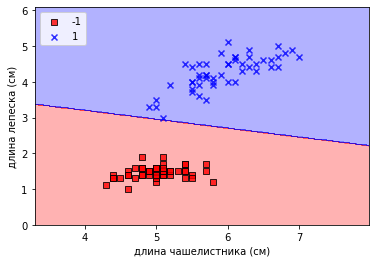

In [19]:
plot_decision_regions(X, y, classifier=ppn1)
plt.xlabel('длина чашелистника (см)')
plt.ylabel('длина лепеска (см)')
plt.legend(loc='upper left')

In [22]:
y_pred = ppn.predict(X)

In [35]:
ppn2 = Perceptron(n_iter = 3).fit(X,y)
y_pred = ppn2.predict(X)
y_p_f = y_pred.reshape(y_pred.shape[0],1)
y_f = y.reshape(y.shape[0],1)
pd.DataFrame(np.hstack((X,y_p_f,y_f)))

,0,1,2,3
0,5.1,1.4,1.0,-1.0
1,4.9,1.4,1.0,-1.0
2,4.7,1.3,1.0,-1.0
3,4.6,1.5,1.0,-1.0
4,5.0,1.4,1.0,-1.0
...,...,...,...,...
95,5.7,4.2,1.0,1.0
96,5.7,4.2,1.0,1.0
97,6.2,4.3,1.0,1.0
98,5.1,3.0,1.0,1.0


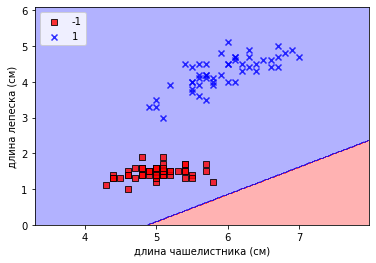

In [45]:
ppn2 = Perceptron(n_iter = 10).fit(X,y)
plot_decision_regions(X, y, classifier=ppn2)
plt.xlabel('длина чашелистника (см)')
plt.ylabel('длина лепеска (см)')
plt.legend(loc='upper left')